# Oklahoma Earthquakes and Saltwater Injection Wells
## Earthquakes in Oklahoma region and Oil and Gas fluid byproduct data.

#### in progress...

In [ ]:
# %pip install pandas
import numpy as np
import pandas as pd
from datetime import datetime as dt

# map creation
# %pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# data visualization 
# %pip install seaborn
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# stat on data
from scipy import stats
from scipy.stats import norm, skew

# feature reduction
from sklearn.decomposition import PCA

#--- data clustering
from sklearn import cluster

#---- Machine learning
# data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
# %pip install xgboost
# import xgboost as xgb

# hyperparameter tunnig
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Import necessary modules for neutral network
# %pip install keras
# import keras
# from keras.layers import Dense, BatchNormalization
# from keras.models import Sequential
# from keras.callbacks import EarlyStopping, ModelCheckpoint, History
# Model evaluation
# %pip install statsmodels
import math
from sklearn import metrics
from statsmodels.graphics.api import abline_plot

## <a id="1"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#7ca4cd; border:0' role="tab" aria-controls="home"><center>1: SEISMIC DATA</center></h3>


## 1.1: Load the seismic data

In [ ]:
# Load the seismic catalog 
catalogue = pd.read_csv('okQuakes.csv')
catalogue.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087,-106.168,6.0,4.5,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917,-90.775,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160,-104.594,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


## 1.2: Plot earthquakes locations

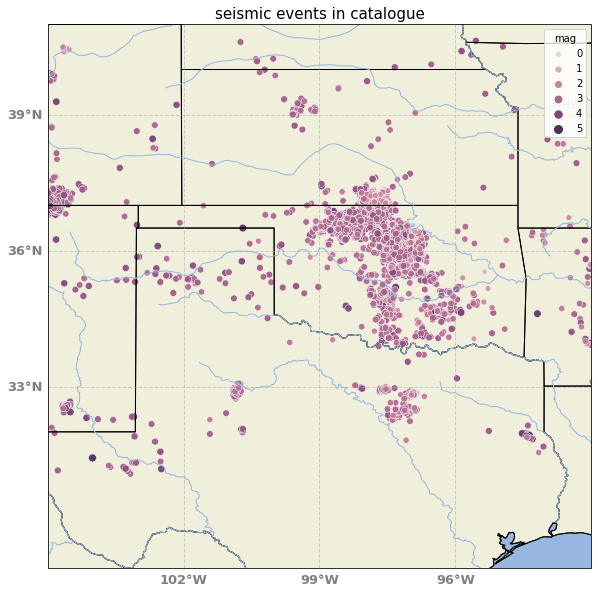

In [ ]:
plt.figure(figsize=(10,10))

ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([-105, -93, 29,41], crs=ccrs.PlateCarree())

# add color
ax1.add_feature(cfeature.OCEAN.with_scale('10m'))
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.RIVERS)
ax1.coastlines()

# add grid
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='darkgray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-102,-99,-96])
gl.ylocator = mticker.FixedLocator([33, 36,39])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}

#
ax1 = sns.scatterplot(x =catalogue['longitude'], y=catalogue['latitude'], hue =catalogue['mag'],size =catalogue['mag'])

# set title
ax1.set_title('seismic events in catalogue',size=15)

plt.show()

In [ ]:
# select seismic event around Oklahoma 
catalogue_ok = catalogue[(catalogue['longitude']>=-102)&(catalogue['longitude']<=-94.5)&
                        (catalogue['latitude']>=33)&(catalogue['latitude']<=39)]
catalogue_ok.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4,1974-02-15T13:33:49.200Z,36.50,-100.693,24.0,4.5,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
21,1974-12-16T02:30:21.400Z,35.33,-97.480,10.0,2.6,ml,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:27.851Z,"Oklahoma City urban area, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,m,tul


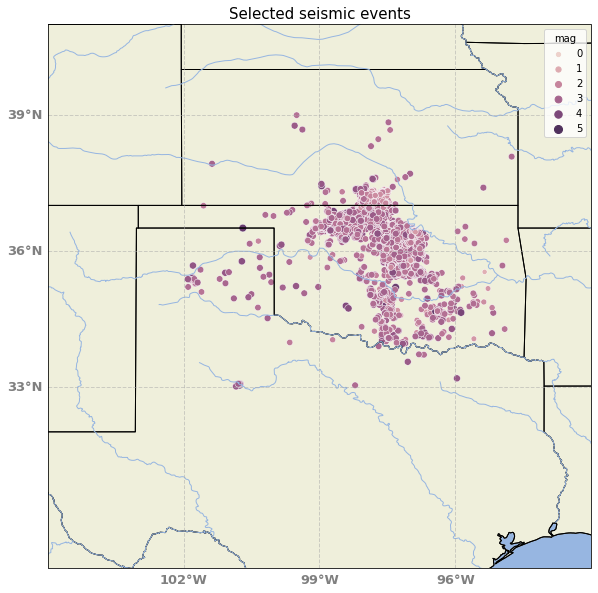

In [ ]:
plt.figure(figsize=(10,10))

# SHOW LOCATION OF THE GEYSER GEOTHERMAL FIELD
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([-105, -93, 29,41], crs=ccrs.PlateCarree())

# add color
ax1.add_feature(cfeature.OCEAN.with_scale('10m'))
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.RIVERS)
ax1.coastlines()

# add grid
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='darkgray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-102,-99,-96])
gl.ylocator = mticker.FixedLocator([33, 36,39])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}

# Selected earthquakes
ax1 = sns.scatterplot(x =catalogue_ok['longitude'], y=catalogue_ok['latitude'], hue =catalogue_ok['mag'],size =catalogue_ok['mag'])

# set title
ax1.set_title('Selected seismic events',size=15)

plt.show()

### 1.3: Clean the dataframe

#### 1.3.1: set date as index

In [ ]:
catalogue_ok['time'] = pd.to_datetime(catalogue_ok['time'])
catalogue_ok = catalogue_ok.set_index('time')
catalogue_ok.tail(2)

/tmp/ipykernel_12851/3602714811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalogue_ok['time'] = pd.to_datetime(catalogue_ok['time'])


,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2016-09-20 17:31:48.380000+00:00,36.9393,-97.8960,2.32,3.0,mb_lg,NaN,37.0,0.056,0.18,us,...,2016-09-20T17:43:43.040Z,"20km NW of Medford, Oklahoma",earthquake,1.0,3.7,0.076,45.0,reviewed,us,us
2016-09-20 17:45:59.920000+00:00,36.9405,-97.9063,7.20,2.5,mb_lg,NaN,39.0,0.048,0.35,us,...,2016-09-20T19:48:57.396Z,"21km NW of Medford, Oklahoma",earthquake,1.0,3.4,0.170,9.0,reviewed,us,us


#### 1.3.2: Verify and replace missing values

In [ ]:
# finction to visualize missing value
def get_percentage_nan_values(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    visualize the percentage of missing values in each columns
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

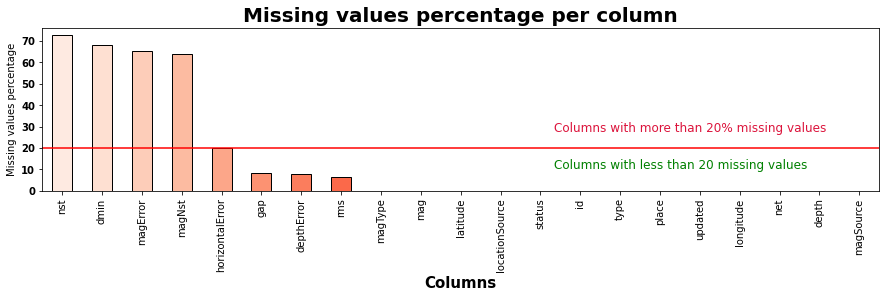

In [ ]:
# show percentage and distribution missing values per columns
get_percentage_nan_values(catalogue_ok, 20, color=sns.color_palette('Reds',15))

In [ ]:
# drop columns with more than 20% of missing value
catalogue_ok = catalogue_ok.dropna(thresh=len(catalogue_ok)*0.8, axis=1)

In [ ]:
catalogue_ok.isnull().sum()

latitude              0
longitude             0
depth                 0
mag                   1
magType              11
gap                 899
rms                 682
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2115
depthError          842
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
# replace missing value by mean columns
catalogue_ok = catalogue_ok.fillna(catalogue_ok.mean())

/tmp/ipykernel_12851/2875468353.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  catalogue_ok = catalogue_ok.fillna(catalogue_ok.mean())


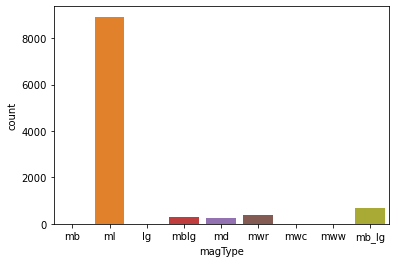

In [ ]:
# used countplot to see the dominant category for magType
sns.countplot(x='magType',data=catalogue_ok)
plt.show()

In [ ]:
# replace nan value in 'magType' by the dominant category: 'ml'
catalogue_ok['magType'] = catalogue_ok['magType'].replace(np.nan,'ml')

## 1.4: Statistical analyses
### 1.4.1: Evolution over time

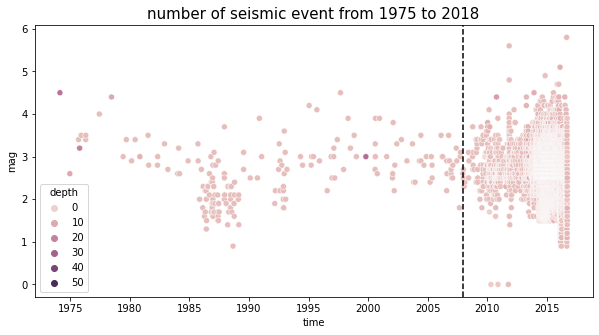

In [ ]:
fig = plt.figure(figsize=(10,5))

# Selected earthquakes
ax1 = sns.scatterplot(x =catalogue_ok.index, y=catalogue_ok['mag'], hue =catalogue_ok['depth'])
ax1 = plt.axvline(dt(2008,1,1), ymin=0, ymax=6,color="black", linestyle="--")

# set title
plt.title('number of seismic event from 1975 to 2018',size=15)
plt.show() 

We observed a strong increase in seismicity after ~2008.
We also observed one earthquake at a depth of 56 km

### 1.4.2: Plot the ECDF of the Earthquake magnitudes

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x 
    x = np.sort(data)
    # y-data for the ECDF: y  The y data of the ECDF go from 1/n to 1 in equally spaced increments. 
    y = np.arange(1,n+1) / n
    
    return x, y

In [ ]:
# Get magnitudes before and after 2008
before_2008 = catalogue_ok[catalogue_ok.index < '2008-01-01']
after_2008  =  catalogue_ok[catalogue_ok.index >= '2008-01-01']

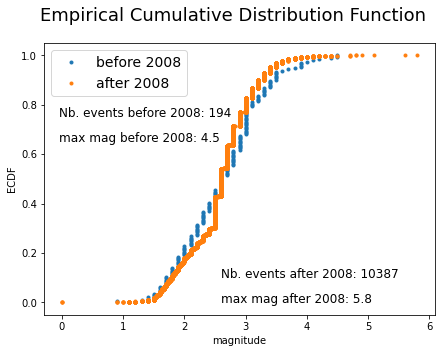

In [ ]:
# define figure size
fig = plt.figure(figsize=(7,5))

# figure title
fig.suptitle('Empirical Cumulative Distribution Function', fontsize=18)

mags_before_2008 = before_2008['mag']
mags_after_2008 = after_2008['mag']
# get number event and max magnitude before and after 2008
max_before_2008 = before_2008['mag'].max() 
nb_before_2008 = len(before_2008['mag'])
max_after_2008 = after_2008['mag'].max() 
nb_after_2008 = len(after_2008['mag'])

# plot ECDF
ax1 = plt.plot(*ecdf(mags_before_2008),marker='.',linestyle = 'none',label='before 2008')
ax2 = plt.plot(*ecdf(mags_after_2008),marker='.',linestyle = 'none',label='after 2008')
ax1 = plt.xlabel('magnitude')
ax1 = plt.ylabel('ECDF')

ax1 = plt.text(2.6, 0.0, 'max mag after 2008: {}'.format(max_after_2008),fontsize=12)
ax1 = plt.text(2.6, 0.1, 'Nb. events after 2008: {}'.format(nb_after_2008),fontsize=12)

ax1 = plt.text(-0.05, 0.65, 'max mag before 2008: {}'.format(max_before_2008),fontsize=12)
ax1 = plt.text(-0.05, 0.75, 'Nb. events before 2008: {}'.format(nb_before_2008),fontsize=12)

plt.legend(fontsize=14)
plt.show()

Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to improvements in sensing capabilities in more recent years.

### 1.4.3: computing b-values

#### Functions used to compute and compare b-values

In [1]:
# define the fonction needed for statistical analysis:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# define fonction to compute b-value with confident interval
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m)-mt)*np.log(10)

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = draw_bs_reps(m, np.mean, n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, [2.5, 97.5])
    
        return b, conf_int
    
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_3, data_4):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_3)-np.mean(data_4)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1,data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [2]:
mt = 2.8
# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_before_2008, mt, perc=[2.5, 97.5], n_reps=10000)

# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_after_2008, mt, perc=[2.5, 97.5], n_reps=10000)

# Report the results
print("""
Before 2008:
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

After 2008
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))


NameError: ignored

#### Is the b-value in Oklahoma before 2008 is really different from the one after 2008?
To answer this question we will:
- include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable.
- perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law.
- plook at the difference between the mean post-2008 magnitude and the mean pre-2008 magnitude.

In [ ]:
mt = 3

# step 1: select only magnitudes above completeness threshold
mags_before_2008 = mags_before_2008[mags_before_2008 >= 2.5]
mags_after_2008 = mags_after_2008[mags_after_2008 >= 2.5]

# step 2: Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_before_2008 ) - np.mean(mags_after_2008)

# Generate permutation replicates: perm_reps
perm_reps = draw_perm_reps(mags_after_2008, mags_before_2008, diff_of_means, size=10000)

# Compute and print p-value
p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

The p-value is about 1.0, suggesting we should reject the null hypothesis that the b-value has not changed.

## 1.5: Earthquakes clustering
### 1.5.1: cluster creation 

In [ ]:
# create df with features to be used for clustering
df_for_cluster = catalogue_ok[['latitude','longitude']]

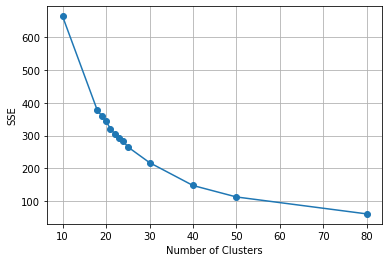

In [ ]:
numClusters = [10,18,19,20,21,22,23,24,25,30,40,50,80]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_for_cluster)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()


In [ ]:
# create 20 clusters and assign cluster id to catalogue_ok
k_means_meq = cluster.KMeans(n_clusters=20, random_state=1)
k_means_meq.fit(df_for_cluster) 
labels = k_means_meq.labels_
centroids = k_means_meq.cluster_centers_
df_label = pd.DataFrame(labels, index=df_for_cluster.index, columns=['Cluster ID'])
df_centroid = pd.DataFrame(centroids,columns=['latitude','longitude'])

catalogue_ok = pd.concat([catalogue_ok,df_label],axis=1)

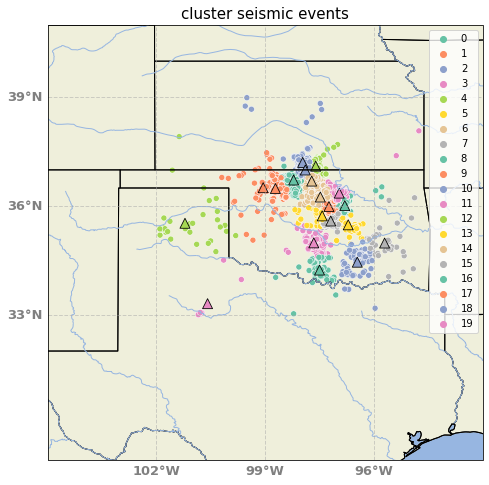

In [ ]:
plt.figure(figsize=(8,8))

# SHOW LOCATION OF THE GEYSER GEOTHERMAL FIELD
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-105, -93, 29,41], crs=ccrs.PlateCarree())

# add color
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()

# add grid
ax = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='darkgray', alpha=0.5, linestyle='--')
ax.top_labels = False
ax.right_labels = False
ax.xlocator = mticker.FixedLocator([-102,-99,-96])
ax.ylocator = mticker.FixedLocator([33, 36,39])
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.xlabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}
ax.ylabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}

# define color
qualitative_colors = sns.color_palette("Set2", 20)

# Selected earthquakes
ax = sns.scatterplot(x = catalogue_ok['longitude'], y= catalogue_ok['latitude'],hue = catalogue_ok['Cluster ID'],
                      palette = qualitative_colors,legend= False)
# plot centroid
ax = sns.scatterplot(x = df_centroid['longitude'], y= df_centroid['latitude'],
                      hue = df_centroid.index, palette = qualitative_colors,s=100,marker='^',edgecolor = 'k')

# set title
ax.set_title('cluster seismic events',size=15)
plt.show()

### 1.5.2: cluster properties 
#### b-values

In [ ]:
# calculate b-value in each cluster after 2008
mt = 2.8
list_b_value_cluster = []
for i in range(20):
    df_c = pd.DataFrame()
    df_c = catalogue_ok[(catalogue_ok.index >= '2008-01-01')&(catalogue_ok['Cluster ID']==i)]
    b = b_value(df_c['mag'], mt, perc=[2.5, 97.5])
    list_b_value_cluster.append((i,b))
    
b_value_cluster = pd.DataFrame(list_b_value_cluster,columns=['clusterid','b-value']) 

### MEQ properties

In [ ]:
cluster_attributes = catalogue_ok.groupby('Cluster ID').median()
cluster_attributes = pd.concat([cluster_attributes,b_value_cluster],axis=1)
cluster_attributes = cluster_attributes.drop(columns=['clusterid'],axis=1)

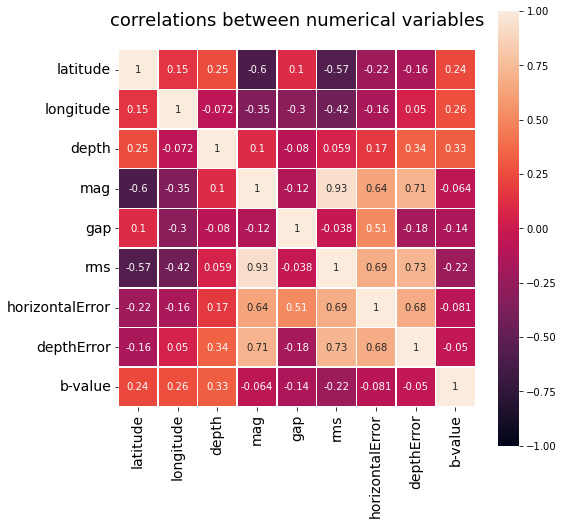

In [ ]:
corr = cluster_attributes.corr(method='pearson')

fig, axes = plt.subplots(1,figsize=(8,8))
ax0 = plt.subplot(1,1,1)
sns.heatmap(corr,annot=True,linewidths=.5, annot_kws={"size": 10},vmin=-1.0, vmax=1.0,square=True,cbar=True)
ax0.set_title('correlations between numerical variables',size=18,y=1.05)
ax0.set_yticklabels(ax0.get_yticklabels(), rotation=0,size=14) 
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90,size=14) 
plt.show()

Interesting correlations between:
- latitude and mag/rms,
- depth and longitude,
- depth and b-value

- horizontal and depth errors with mag and rms (may highlight the influence of the seismic network (location of the seismic stations) on the seismic catalogue?)

## <a id="2"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#7ca4cd; border:0' role="tab" aria-controls="home"><center>2: INJECTION DATA</center></h3>

In [ ]:
# step1: Load the lists all active saltwater injection wells in the state of Oklahoma.
df_inj_well = pd.read_csv('InjectionWells.csv')
df_inj_well.head(3)

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,...,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,133856.0,9/6/1977,ALFALFA,13,...,10W,C-SE SE,36.900324,-98.21826,"2,500",300,CHEROKEE,NaN,NaN,NaN
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,470258.0,11/27/2002,ALFALFA,21,...,09W,C-NW NW,36.896636,-98.17772,"2,400","1,000",RED FORK,NaN,NaN,NaN
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,329426.0,8/19/1988,ALFALFA,24,...,11W,SE NE,36.806113,-98.32584,"1,050","1,000",RED FORK,NaN,NaN,NaN


In [ ]:
df_inj_well.describe()

,API#,Operator ID,OrderNumbers,LAT,LONG,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,1.112500e+04,11125.000000,1.112400e+04,11125.000000,11125.000000,0.0,0.0,0.0
mean,3.508264e+09,18212.844225,3.079450e+08,35.207878,-96.849979,NaN,NaN,NaN
std,4.833633e+06,8922.533405,5.886448e+08,2.689511,7.575851,NaN,NaN,NaN
min,3.500300e+09,153.000000,1.939300e+04,0.000000,-203.625566,NaN,NaN,NaN
25%,3.503710e+09,14156.000000,1.711480e+05,34.441536,-97.631560,NaN,NaN,NaN
50%,3.509320e+09,19467.000000,3.880600e+05,35.154533,-97.366105,NaN,NaN,NaN
75%,3.513304e+09,22220.000000,5.697722e+05,36.124345,-96.537961,NaN,NaN,NaN
max,3.515324e+09,510758.000000,1.701070e+10,73.986030,97.695750,NaN,NaN,NaN


The minimal latitude is '0'....

In [ ]:
df_inj_well = df_inj_well[(df_inj_well['LONG']>-105)&(df_inj_well['LONG']<-93)&
                         (df_inj_well['LAT']>29)&(df_inj_well['LAT']<41)]

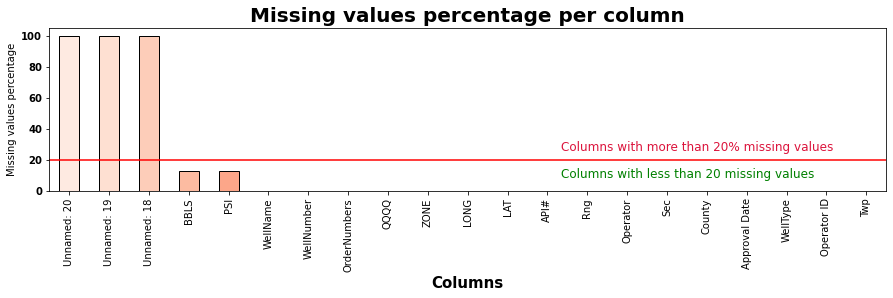

In [ ]:
# show percentage and distribution missing values per columns
get_percentage_nan_values(df_inj_well, 20, color=sns.color_palette('Reds',15))

In [ ]:
# drop columns with more than 20% of missing value
df_inj_well = df_inj_well.dropna(thresh=len(catalogue_ok)*0.8, axis=1)

In [ ]:
columns_to_drop = ['Operator ID','OrderNumbers','ZONE','QQQQ','County','Sec','Twp','Rng','WellName','WellNumber']
df_inj_well = df_inj_well.drop(columns_to_drop,axis=1)
df_inj_well.tail()

,API#,Operator,WellType,Approval Date,LAT,LONG,PSI,BBLS
11117,3.515323e+09,WHEELER ENERGY LLC,2R,12/12/2007,36.263285,-99.557631,"3,000","1,000"
11118,3.515323e+09,WHEELER ENERGY LLC,2R,11/28/2007,36.263220,-99.548647,"3,000","1,000"
11119,3.515323e+09,WOODWARD IODINE CORPORATION,2D,4/19/2016,36.520161,-99.334183,"1,500","19,999"
11120,3.515323e+09,WOODWARD IODINE CORPORATION,2D,4/22/2016,36.276728,-99.298563,"1,792","19,999"
11121,3.515324e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,2D,12/7/2012,36.436857,-99.137391,"2,940","60,000"


In [ ]:
# drop last row:
df_inj_well = df_inj_well[:-1]
# define API number as string
df_inj_well['API#'] = df_inj_well.loc[:'API#'].astype(str)
# check nan values
print("number of wells: {}".format(df_inj_well.shape[0]))
df_inj_well.isnull().sum()

ValueError: Columns must be same length as key

In [ ]:
df_inj_well.head(2)

,API#,Operator,WellType,Approval Date,LAT,LONG,PSI,BBLS
0,3.500300e+09,PHOENIX PETROCORP INC,2R,9/6/1977,36.900324,-98.21826,"2,500",300
1,3.500300e+09,CHAMPLIN EXPLORATION INC,2R,11/27/2002,36.896636,-98.17772,"2,400","1,000"


In [ ]:
df_inj_well.dtypes

API#             float64
Operator          object
WellType          object
Approval Date     object
LAT              float64
LONG             float64
PSI               object
BBLS              object
dtype: object

In [ ]:
# define string as number
df_inj_well['PSI'] = pd.to_numeric(df_inj_well['PSI'], errors='coerce')
df_inj_well['BBLS'] = pd.to_numeric(df_inj_well['BBLS'], errors='coerce')
df_inj_well = df_inj_well.dropna()

### EDA

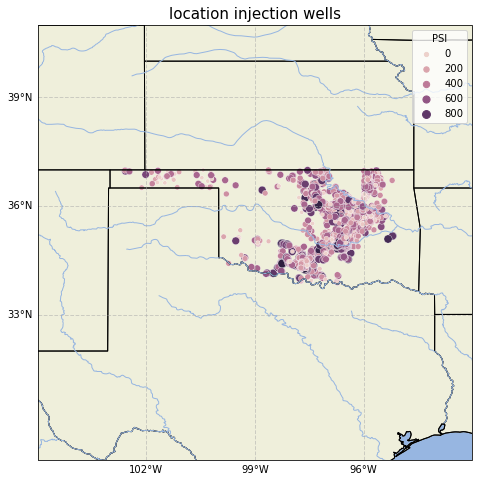

In [ ]:
plt.figure(figsize=(8,8))

# SHOW LOCATION OF THE GEYSER GEOTHERMAL FIELD
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-105, -93, 29,41], crs=ccrs.PlateCarree())

# add color
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()

# add grid
ax = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='darkgray', alpha=0.5, linestyle='--')
ax.top_labels = False
ax.right_labels = False
ax.xlocator = mticker.FixedLocator([-102,-99,-96])
ax.ylocator = mticker.FixedLocator([33, 36,39])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}

# Selected earthquakes
ax1 = sns.scatterplot(x =df_inj_well['LONG'], y=df_inj_well['LAT'], hue =df_inj_well['PSI'],size =df_inj_well['PSI'])

# set title
ax1.set_title('location injection wells',size=15)

plt.show()

### Injection wells clustering

In [ ]:
# create df with features to be used for clustering
df_inj_well_for_cluster = df_inj_well[['LAT','LONG']]

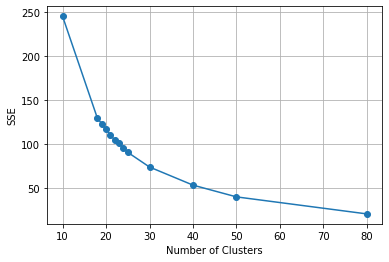

In [ ]:
# calculate b-value in each cluster after 2008
numClusters = [10,18,19,20,21,22,23,24,25,30,40,50,80]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_inj_well_for_cluster)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()


In [ ]:
# create 20 clusters and assign cluster id to catalogue_ok
k_means = cluster.KMeans(n_clusters=20, random_state=1)
k_means.fit(df_inj_well_for_cluster) 
labels = k_means.labels_
centroids = k_means.cluster_centers_
df_label = pd.DataFrame(labels, index=df_inj_well.index, columns=['Cluster ID'])
df_centroid_inj = pd.DataFrame(centroids,columns=['latitude','longitude'])

df_inj_well = pd.concat([df_inj_well,df_label],axis=1)

## <a id="2"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#7ca4cd; border:0' role="tab" aria-controls="home"><center>3: comparison earthquake - injection</center></h3>

## 3.1: earthquake' locations vs injection wells location

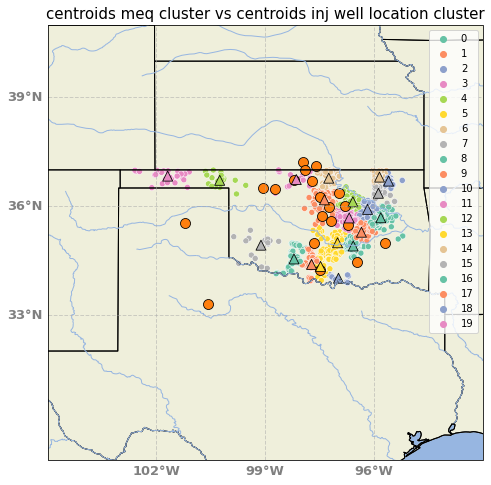

In [ ]:
plt.figure(figsize=(8,8))

# SHOW LOCATION OF THE GEYSER GEOTHERMAL FIELD
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-105, -93, 29,41], crs=ccrs.PlateCarree())

# add color
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()

# add grid
ax = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='darkgray', alpha=0.5, linestyle='--')
ax.top_labels = False
ax.right_labels = False
ax.xlocator = mticker.FixedLocator([-102,-99,-96])
ax.ylocator = mticker.FixedLocator([33, 36,39])
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.xlabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}
ax.ylabel_style = {'size': 13, 'color': 'gray', 'weight': 'bold'}

# define color
qualitative_colors = sns.color_palette("Set2", 20)
h = .02

# Selected earthquakes
ax = sns.scatterplot(x = df_inj_well['LONG'], y= df_inj_well['LAT'],hue = df_inj_well['Cluster ID'],
                      palette = qualitative_colors,legend= False)
# plot centroid
ax = sns.scatterplot(x = df_centroid['longitude'], y= df_centroid['latitude'],s=100,marker='o',edgecolor = 'k')
ax = sns.scatterplot(x = df_centroid_inj['longitude'], y= df_centroid_inj['latitude'],
                      hue = df_centroid_inj.index, palette = qualitative_colors,s=100,marker='^',edgecolor = 'k')




# set title
ax.set_title('centroids meq cluster vs centroids inj well location cluster',size=15)
plt.show()

no clear relation between earthquake location and eartquake location

## 3.2: comparison evolution MEQ and number of injection wells

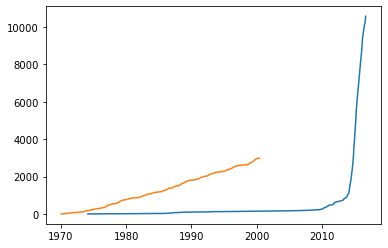

In [ ]:
catalogue_ok['count'] = 1
catalogue_ok['cumsum'] = catalogue_ok['count'].cumsum()
catalogue_ok.drop('count',axis = 1,inplace = True)

df_inj_well['count'] = 1
df_inj_well['cumsum'] = df_inj_well['count'].cumsum()
df_inj_well.drop('count',axis = 1,inplace = True)

plt.plot(catalogue_ok.index, catalogue_ok['cumsum'])
plt.plot(df_inj_well.index, df_inj_well['cumsum'])


### Solution Task 1 

Provide data visualization of the assigned seismic cluster and injection wells using boxplots and
another method of your choice (e.g. histograms or scatterplots)

In [ ]:
my_id = 895205976
last_4_digits = [5,9,7,6]
my_cluster_number = sum(last_4_digits)%20

In [ ]:
catalogue_ok.shape

(10581, 19)

In [ ]:
catalogue_ok.head()

,latitude,longitude,depth,mag,magType,gap,rms,net,id,updated,place,type,horizontalError,depthError,status,locationSource,magSource,Cluster ID,cumsum
time,,,,,,,,,,,,,,,,,,,
1974-02-15 13:33:49.200000+00:00,36.500,-100.693,24.0,4.5,mb,90.413324,0.434086,us,usp00005ac,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,us,4,1
1974-12-16 02:30:21.400000+00:00,35.330,-97.480,10.0,2.6,ml,90.413324,0.434086,us,usp000094v,2014-11-06T23:21:27.851Z,"Oklahoma City urban area, Oklahoma",earthquake,1.388079,4.435129,reviewed,m,tul,3,2
1975-09-13 01:25:02.800000+00:00,34.139,-97.369,5.0,3.4,lg,90.413324,0.434086,us,usp0000csk,2014-11-06T23:21:31.918Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,tul,8,3
1975-10-12 02:58:11.200000+00:00,34.816,-97.406,20.0,3.2,lg,90.413324,0.434086,us,usp0000d4a,2014-11-06T23:21:32.248Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,tul,3,4
1975-11-29 14:29:40.900000+00:00,34.521,-97.347,5.0,3.5,lg,90.413324,0.434086,us,usp0000dsb,2014-11-06T23:21:32.839Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,slm,8,5


In [ ]:
df_inj_well.shape

(2977, 10)

In [ ]:
df_inj_well.head()

,API#,Operator,WellType,Approval Date,LAT,LONG,PSI,BBLS,Cluster ID,cumsum
19,3.500322e+09,ATCHLEY RESOURCES INC,2D,4/2/2012,36.864566,-98.301070,500.0,100.0,3,1
108,3.500330e+09,SANNER JERRY OIL PROPERTIES INC,2D,12/9/1969,36.537332,-98.383413,400.0,800.0,3,2
115,3.500335e+09,ARVINE ENVIRONMENTAL LLC,2D,7/14/1969,36.555531,-98.338596,0.0,35.0,3,3
118,3.500700e+09,TEX-OK ENERGY LP,2D,4/1/1964,36.534523,-100.227895,250.0,600.0,4,4
130,3.500721e+09,URBAN OIL & GAS GROUP LLC,2D,2/23/1974,36.995586,-100.429054,0.0,200.0,4,5


In [ ]:
# my cluster ID = 7
# so I pick the clusters with id 7


# Earth quakes cluster
df_catalogue_my_cluster = catalogue_ok.loc[catalogue_ok['Cluster ID']==my_cluster_number]

In [ ]:
df_catalogue_my_cluster.head()

,latitude,longitude,depth,mag,magType,gap,rms,net,id,updated,place,type,horizontalError,depthError,status,locationSource,magSource,Cluster ID,cumsum
time,,,,,,,,,,,,,,,,,,,
2006-12-21 02:41:14.650000+00:00,35.464,-97.407,5.0,2.6,md,132.5,0.434086,us,usp000f0pc,2014-11-07T01:31:10.319Z,"Oklahoma City urban area, Oklahoma",earthquake,1.388079,4.435129,reviewed,tul,tul,7,183
2006-12-21 06:14:06.710000+00:00,35.464,-97.407,5.0,2.7,md,97.6,0.434086,us,usp000f0pm,2014-11-07T01:31:10.335Z,"Oklahoma City urban area, Oklahoma",earthquake,1.388079,4.435129,reviewed,tul,tul,7,184
2008-10-21 19:05:15.150000+00:00,35.677,-97.131,5.0,2.7,mblg,125.6,1.050000,us,usp000gkrx,2014-11-07T01:37:31.085Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,us,7,205
2008-10-30 16:25:00.670000+00:00,35.443,-97.118,5.0,3.1,mblg,137.1,1.080000,us,usp000gmer,2015-03-24T02:25:21.447Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,us,7,207
2009-01-30 00:57:52.380000+00:00,35.724,-96.920,5.0,2.4,mblg,150.5,1.450000,us,usp000gt8m,2015-03-24T02:00:10.811Z,Oklahoma,earthquake,1.388079,4.435129,reviewed,us,us,7,210


In [ ]:
df_catalogue_my_cluster['mag'].unique()

array([2.6       , 2.7       , 3.1       , 2.4       , 3.4       ,
       3.3       , 1.8       , 2.3       , 2.5       , 2.8       ,
       3.5       , 3.        , 2.1       , 3.6       , 2.        ,
       3.8       , 3.7       , 3.2       , 2.2       , 1.7       ,
       1.9       , 0.        , 2.9       , 1.6       , 3.9       ,
       4.4       , 4.2       , 2.58450189, 4.        , 1.5       ])

In [ ]:
# injection wells clusters

df_inject_my_cluster = df_inj_well[df_inj_well['Cluster ID']==my_cluster_number]

In [ ]:
df_inject_my_cluster.head()

,API#,Operator,WellType,Approval Date,LAT,LONG,PSI,BBLS,Cluster ID,cumsum
5627,3.509720e+09,WAGNER OIL COMPANY,2R,7/22/1983,36.121901,-95.439159,375.0,150.0,7,1197
5628,3.509721e+09,WAGNER OIL COMPANY,2R,9/8/2000,36.128245,-95.432496,300.0,100.0,7,1198
5629,3.509721e+09,WAGNER OIL COMPANY,2R,1/6/1989,36.130048,-95.427034,350.0,100.0,7,1199
5630,3.509721e+09,WAGNER OIL COMPANY,2R,10/25/1983,36.130052,-95.429269,375.0,100.0,7,1200
8224,3.513105e+09,GATEWAY RESOURCES USA INC,2D,11/15/2001,36.531219,-95.773878,500.0,750.0,7,2039


#### boxplot of my assigned catalogue cluster

Text(0.5, 1.0, 'Seismic Events Bar plots Showing Magnitude Distribution against rms')

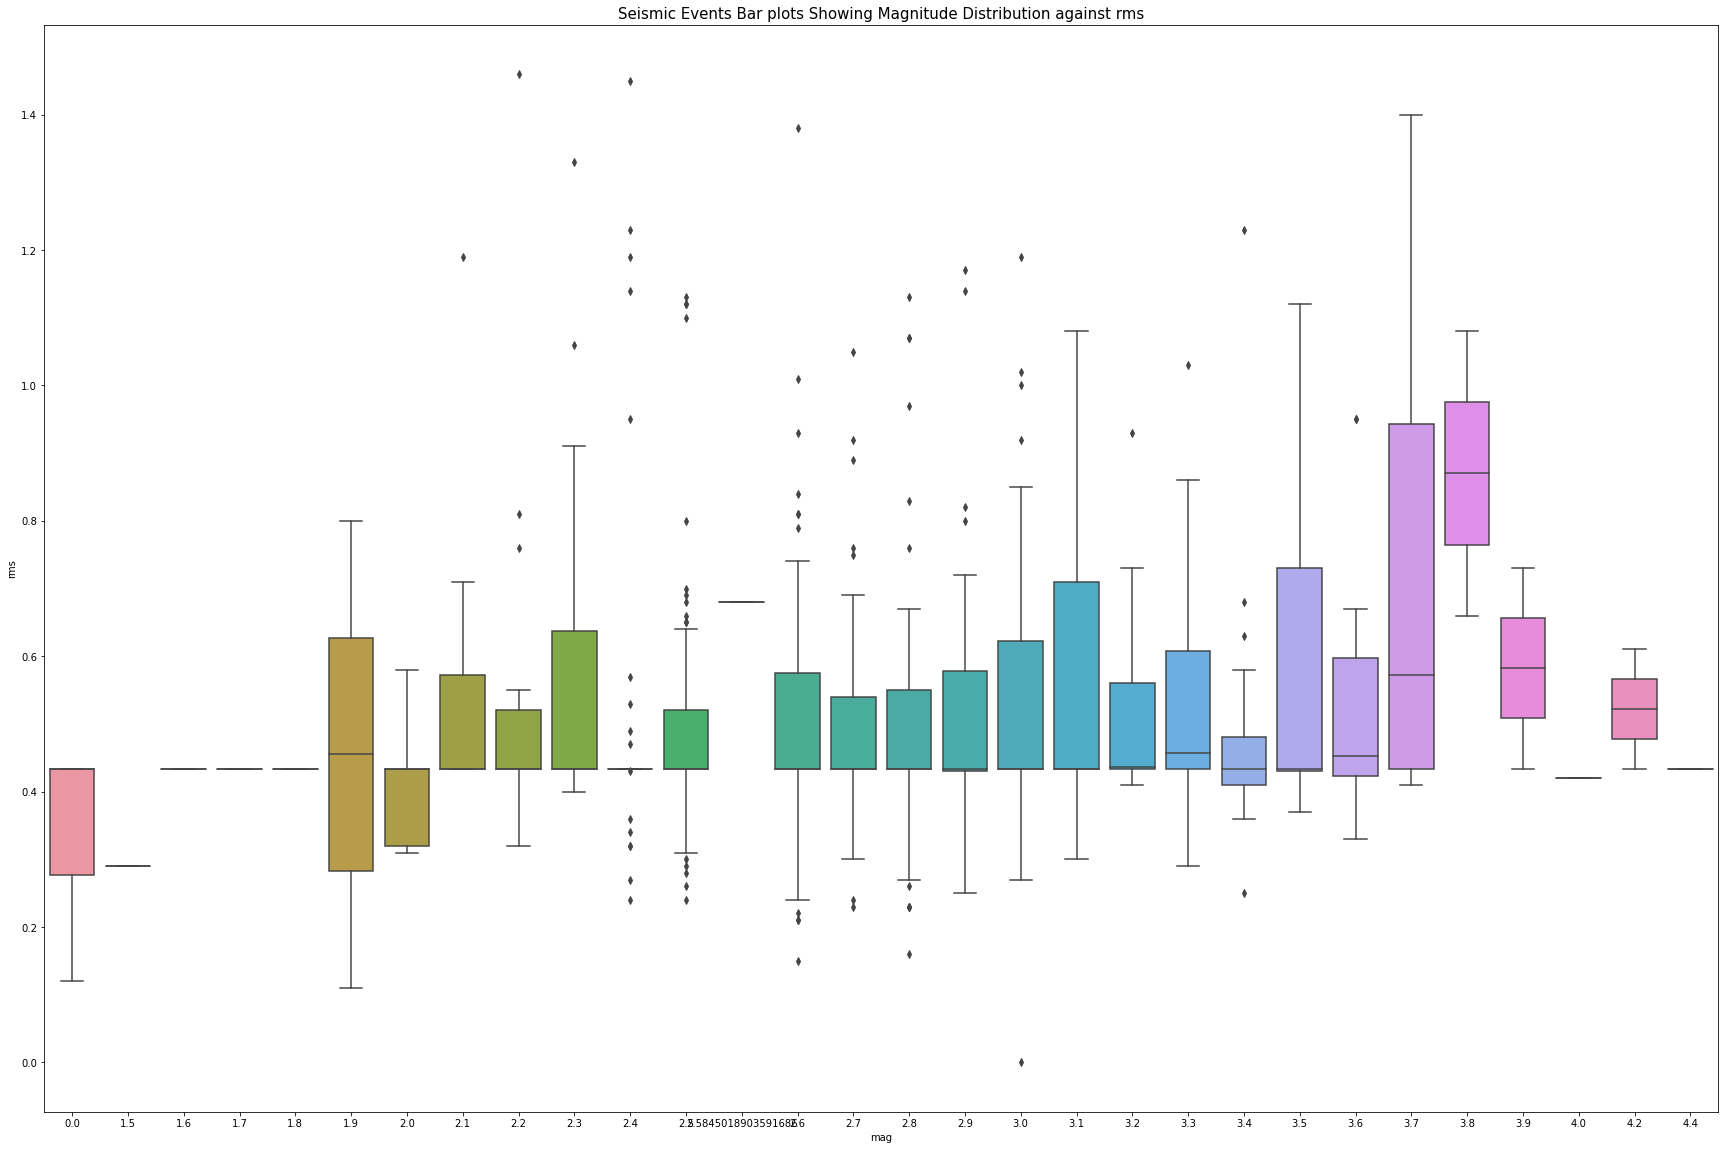

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(data=df_catalogue_my_cluster, x='mag', y='rms', ax=ax)
ax.set_title('Seismic Events Bar plots Showing Magnitude Distribution against rms', size=15)

#### boxplot of my assigned injection well cluster

Text(0.5, 1.0, 'Injection Events Bar plots Showing their PSI Distribution against BBLS')

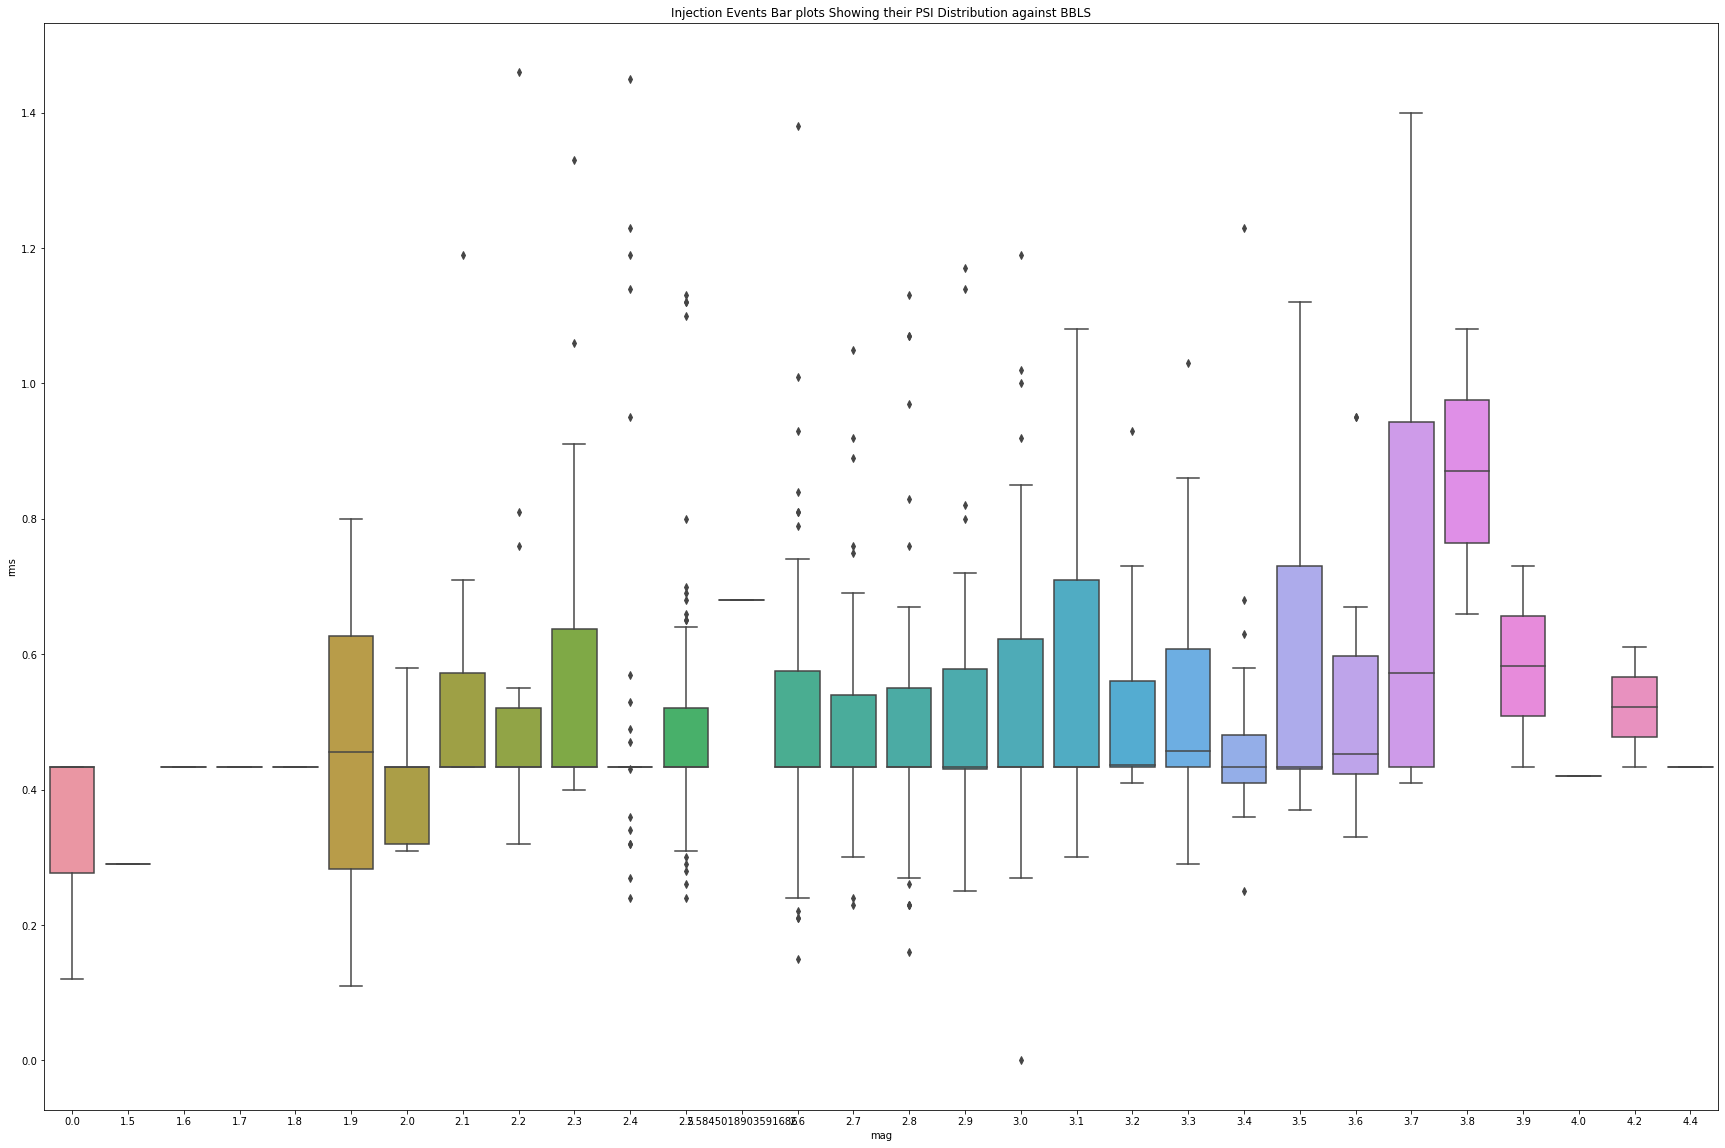

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(data=df_catalogue_my_cluster, x='mag', y='rms', ax=ax)
ax.set_title('Injection Events Bar plots Showing their PSI Distribution against BBLS')

#### Scatter plot of my assigned catalogue cluster

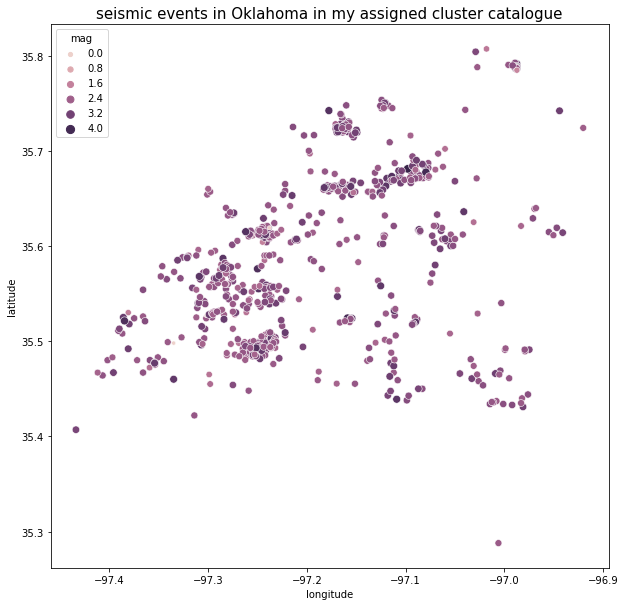

In [ ]:
plt.figure(figsize=(10,10))

ax1 = sns.scatterplot(x =df_catalogue_my_cluster['longitude'], y=df_catalogue_my_cluster['latitude'], hue =df_catalogue_my_cluster['mag'],size =df_catalogue_my_cluster['mag'])

# set title
ax1.set_title('seismic events in Oklahoma in my assigned cluster catalogue',size=15)

plt.show()

#### Scatter plot of my assigned injection cluster

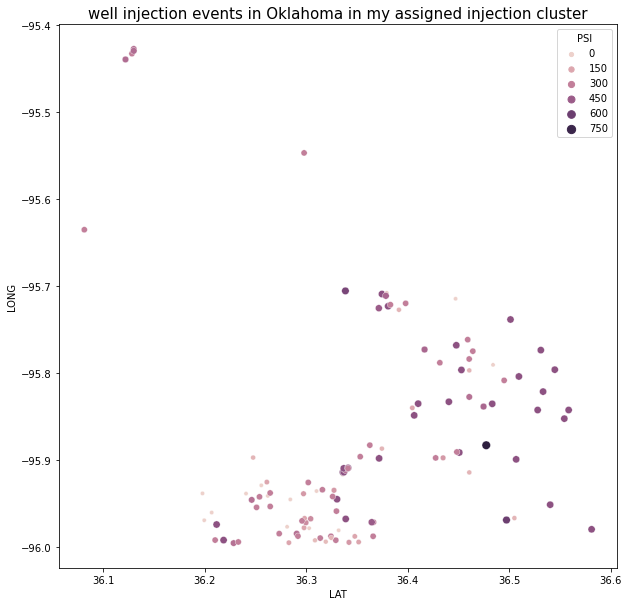

In [ ]:
plt.figure(figsize=(10,10))

ax1 = sns.scatterplot(data=df_inject_my_cluster, x ='LAT', y='LONG', hue ='PSI',size ='PSI')

# set title
ax1.set_title('well injection events in Oklahoma in my assigned injection cluster',size=15)

plt.show()

#### **Solution Task 2**

Perform regression analysis using least squares method for seismic data (Mag. Vs. Time). Select
the time interval (2010 – 2015) and determine R2. Show that by splitting the time interval range,
R2 can be improved.

In [ ]:
df_catalogue_my_cluster.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'rms', 'net',
       'id', 'updated', 'place', 'type', 'horizontalError', 'depthError',
       'status', 'locationSource', 'magSource', 'Cluster ID', 'cumsum'],
      dtype='object')

In [ ]:
df_catalogue_my_cluster.index

DatetimeIndex(['2006-12-21 02:41:14.650000+00:00',
               '2006-12-21 06:14:06.710000+00:00',
               '2008-10-21 19:05:15.150000+00:00',
               '2008-10-30 16:25:00.670000+00:00',
               '2009-01-30 00:57:52.380000+00:00',
               '2009-07-01 17:14:48.240000+00:00',
               '2009-07-22 02:25:59.800000+00:00',
               '2009-07-23 22:23:46.510000+00:00',
               '2009-08-14 20:08:58.490000+00:00',
                      '2009-08-27 12:58:25+00:00',
               ...
               '2016-08-17 14:32:39.900000+00:00',
               '2016-08-17 15:13:44.700000+00:00',
               '2016-08-17 19:55:23.100000+00:00',
               '2016-08-20 13:47:35.800000+00:00',
               '2016-08-27 04:38:48.900000+00:00',
               '2016-08-29 03:16:16.300000+00:00',
               '2016-08-29 10:50:43.260000+00:00',
               '2016-09-03 02:39:52.900000+00:00',
               '2016-09-09 02:06:29.040000+00:00',
            

#### Least Squares Regression

In [ ]:
my_cluster_catalogue = df_catalogue_my_cluster.copy().reset_index()

In [ ]:
my_cluster_catalogue.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap',
       'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError',
       'depthError', 'status', 'locationSource', 'magSource', 'Cluster ID',
       'cumsum'],
      dtype='object')

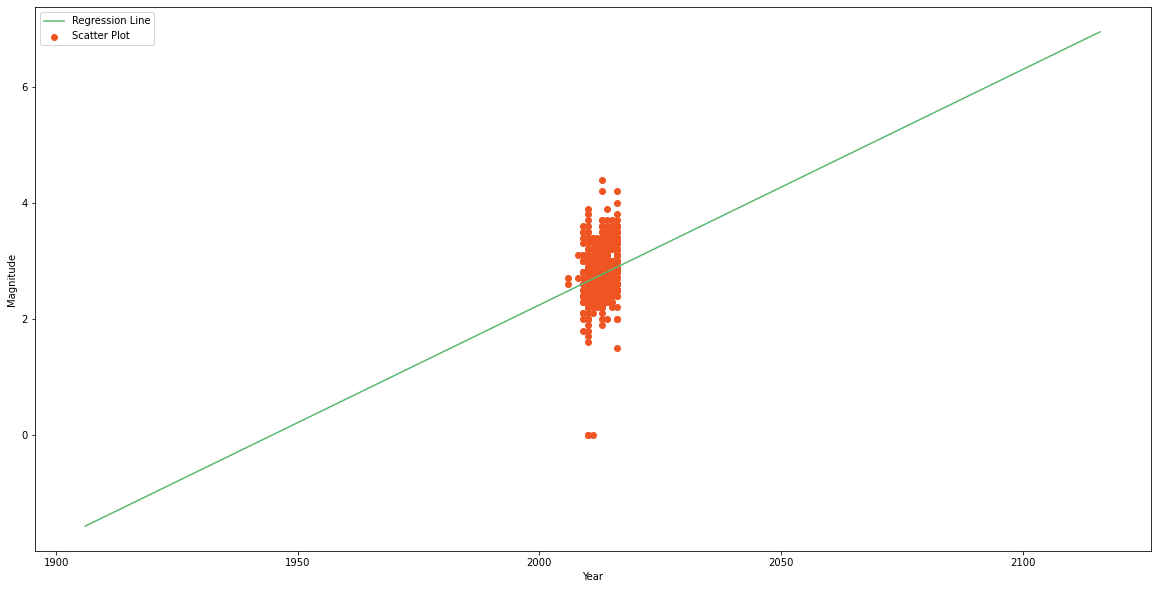

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression

X = pd.to_datetime(my_cluster_catalogue['time']).dt.year
Y = my_cluster_catalogue['mag']


# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
 
# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = c + m * x
 
# Ploting Line
plt.figure(figsize=(20,10))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


#### **Solution Task 3**


Perform hypothesis tests using Chi-Square and ANOVA on seismic and injection wells data
respectively. Create the categories of high- and low- magnitude earthquakes in the assigned
cluster region for Chi-square test. Carry out ANOVA using 3 or more injection wells to check
statistically significant differences in the means of various operating parameters for injection
wells.

#### **CHI square** 

#### Seismic data

In [ ]:
# high and low mag earthquakes

cat_high = df_catalogue_my_cluster[df_catalogue_my_cluster['mag'] > 3.0]
cat_low = df_catalogue_my_cluster[df_catalogue_my_cluster['mag'] < 2.0]

In [ ]:
cat_high.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'rms', 'net',
       'id', 'updated', 'place', 'type', 'horizontalError', 'depthError',
       'status', 'locationSource', 'magSource', 'Cluster ID', 'cumsum'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

cat_cols = ['depth', 'mag','gap', 'rms']
chi_data_cat_high = cat_high[cat_cols]
chi_data_cat_low = cat_low[cat_cols]

In [ ]:
# CHI for high mag catalogue
print('CHI test for High mag catalogue')

stat, p, dof, expected = chi2_contingency(chi_data_cat_high)
  
# interpret p-value
alpha = 0.05
print("p value is ", p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

CHI test for High mag catalogue
p value is  0.9999999999925795
Independent (H0 holds true)


In [ ]:
# CHI for low mag catalogue
print('CHI test for Low mag catalogue')

stat, p, dof, expected = chi2_contingency(chi_data_cat_low)
  
# interpret p-value
alpha = 0.05
print("p value is ", p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

CHI test for Low mag catalogue
p value is  0.6533171084471946
Independent (H0 holds true)


#### injection data

In [ ]:
df_inject_my_cluster.columns

Index(['API#', 'Operator', 'WellType', 'Approval Date', 'LAT', 'LONG', 'PSI',
       'BBLS', 'Cluster ID', 'cumsum'],
      dtype='object')

In [ ]:
injectio_cols_chi = ['PSI', 'BBLS', 'cumsum', 'Cluster ID']
chi_inj = df_inject_my_cluster[injectio_cols_chi]

In [ ]:
# CHI injection wells

stat, p, dof, expected = chi2_contingency(chi_inj)
  
# interpret p-value
alpha = 0.05
print("p value is ", p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is  0.0
Dependent (reject H0)


#### **ANOVA**

#### Seismic data

In [ ]:
cat_nov = df_catalogue_my_cluster[cat_cols]
cat_nov.columns

Index(['depth', 'mag', 'gap', 'rms'], dtype='object')

In [ ]:
from scipy import stats

F, p = stats.f_oneway(cat_nov['mag'], cat_nov['depth'], cat_nov['rms'])

print('F value for seismic ANOVA: ', F)
print('P value for seismic ANOVA: ', p)

F value for seismic ANOVA:  4046.408172121833
P value for seismic ANOVA:  0.0


#### Injection data

In [ ]:
injection_nov = df_inject_my_cluster[injectio_cols_chi]
injection_nov.columns

Index(['PSI', 'BBLS', 'cumsum', 'Cluster ID'], dtype='object')

In [ ]:
from scipy import stats

F, p = stats.f_oneway(injection_nov['PSI'], injection_nov['BBLS'], injection_nov['cumsum'])

print('F value for injection wells ANOVA: ', F)
print('P value for injection wells ANOVA: ', p)

F value for injection wells ANOVA:  2598.2237236652463
P value for injection wells ANOVA:  1.5816465425148738e-207
